1.  Khám phá dữ liệu

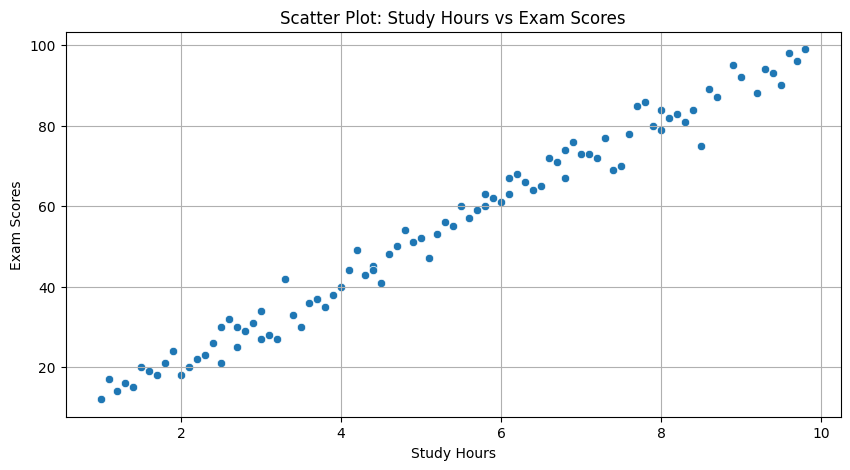

In [ ]:
# Cài pandas: pip install pandas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Đọc dữ liệu từ file CSV
data = pd.read_csv('score_updated.csv')

# Vẽ scatter plot
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Hours', y='Scores', data=data)
plt.title("Scatter Plot: Study Hours vs Exam Scores")
plt.xlabel("Study Hours")
plt.ylabel("Exam Scores")
plt.grid()
plt.show()


>Từ biểu đồ scatter plot, ta có thể thấy rằng có một mối quan hệ tích cực rõ ràng giữa số giờ học và điểm thi. Khi số giờ học tăng lên, điểm thi cũng có xu hướng tăng.

>Mối quan hệ này có vẻ mạnh, vì hầu hết các điểm dữ liệu đều nằm gần một đường thẳng tưởng tượng từ góc dưới bên trái (thấp) đến góc trên bên phải (cao). Điều này cho thấy rằng việc học nhiều hơn có thể dẫn đến điểm thi cao hơn một cách đáng kể.

2. Huấn luyện mô hình tuyến tính (1 biến) 

Dùng stats.linregress(x, y) để lấy slope, intercept, r, p, std_err. 
Vẽ đường hồi quy lên scatter plot. 

Slope: 9.901318259246036
Intercept: 1.8635766281174924
R-value: 0.9906398612293453
P-value: 4.179686470233631e-83
Standard Error: 0.14071836691047818


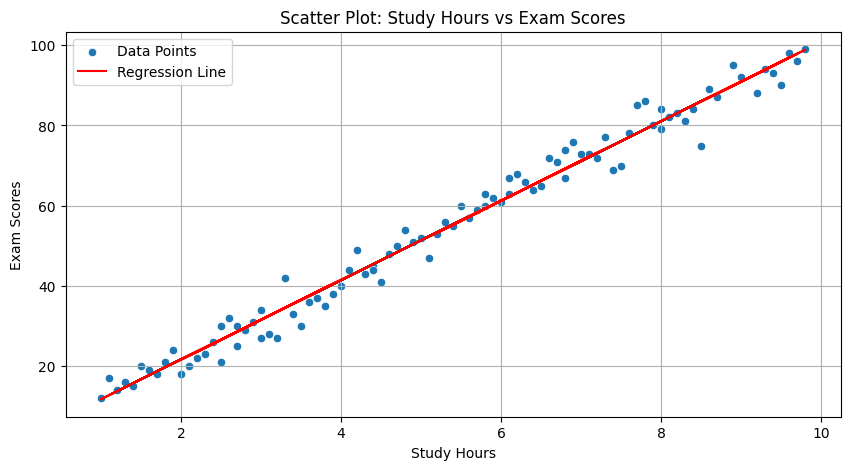

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress


data = pd.read_csv('score_updated.csv')  


x = data['Hours']  
y = data['Scores'] 

slope, intercept, r_value, p_value, std_err = linregress(x, y)

print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-value: {r_value}")
print(f"P-value: {p_value}")
print(f"Standard Error: {std_err}")

plt.figure(figsize=(10, 5))
sns.scatterplot(x=x, y=y, label='Data Points')
plt.title("Scatter Plot: Study Hours vs Exam Scores")
plt.xlabel("Study Hours")
plt.ylabel("Exam Scores")

plt.plot(x, slope * x + intercept, color='red', label='Regression Line')
plt.legend()
plt.grid()
plt.show()

3. Ý nghĩa 

    Slope cho biết mức thay đổi điểm thi khi số giờ học tăng thêm 1 giờ. Ví dụ, nếu slope = 5, thì mỗi giờ học thêm, điểm thi trung bình tăng 5 điểm.
    
    Intercept là điểm thi ước tính khi số giờ học = 0. Ví dụ, nếu intercept = 50, sinh viên không học sẽ có điểm thi ước tính là 50.

    R-value cho biết mức độ liên kết giữa giờ học và điểm thi, với giá trị từ -1 (nghịch hoàn hảo) đến 1 (tỷ lệ thuận hoàn hảo).
    R² cho biết phần trăm biến thiên trong điểm thi mà mô hình giải thích. Ví dụ, R² = 0.85 nghĩa là 85% biến thiên điểm thi được giải thích bởi số giờ học.

    P-value cho biết liệu hệ số góc có khác 0 một cách có ý nghĩa thống kê hay không. Nếu p < 0.05, có bằng chứng cho thấy giờ học có ảnh hưởng đáng kể đến điểm thi.

4. Đánh giá



Công Thức Tính MAE, RMSE, R²
MAE (Mean Absolute Error):

[
\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|
]
(với (y_i) là giá trị thực tế, (\hat{y}_i) là giá trị dự đoán và (n) là số lượng mẫu)


RMSE (Root Mean Squared Error):

[
\text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}
]


R² (R-squared):

[
R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}i)^2}{\sum{i=1}^{n} (y_i - \bar{y})^2}
]
(với (\bar{y}) là giá trị trung bình của các giá trị thực tế)

In [ ]:
import pandas as pd
import numpy as np

# Giả sử 
y = np.array([50, 55, 65, 70, 75, 80, 85, 90])  # Giá trị thực tế
y_pred = np.array([52, 57, 63, 72, 75, 82, 84, 91])  # Giá trị dự đoán


mae = np.mean(np.abs(y - y_pred))


rmse = np.sqrt(np.mean((y - y_pred) ** 2))

ss_res = np.sum((y - y_pred) ** 2)
ss_tot = np.sum((y - np.mean(y)) ** 2)
r_squared = 1 - (ss_res / ss_tot)

results = pd.DataFrame({
    'Metric': ['MAE', 'RMSE', 'R²'],
    'Value': [mae, rmse, r_squared]
})

print(results)

1. MAE (Mean Absolute Error)

Ý nghĩa: Sai lệch trung bình tuyệt đối giữa giá trị thực và dự đoán.

Đánh giá: MAE thấp (ví dụ: 3) cho thấy mô hình chính xác; MAE cao (ví dụ: 10) cần cải thiện.

2. RMSE (Root Mean Squared Error)

Ý nghĩa: Đo độ sai lệch bình phương trung bình, nhấn mạnh các lỗi lớn.

Đánh giá: RMSE nhỏ (ví dụ: 4) cho thấy hiệu suất tốt; lớn hơn MAE chỉ ra sai số lớn.

3. R² (R-squared)

Ý nghĩa: Phần trăm biến thiên trong dữ liệu được mô hình giải thích.

Đánh giá: R² cao (ví dụ: 0.85) cho thấy mô hình giải thích tốt; R² gần 0 cho thấy hiệu suất kém.

4. P-value

Ý nghĩa: Kiểm tra ý nghĩa thống kê của hệ số góc.

Đánh giá: P-value < 0.05 cho thấy giờ học có ảnh hưởng đáng kể đến điểm thi; ngược lại nếu > 0.05.

Kết luận

Nếu MAE, RMSE thấp, R² cao và p-value nhỏ hơn 0.05, mô hình là tốt. Ngược lại, cần cải thiện.